Authors: Mariana Moreira, Rui Calado, Miguel Pardal and Jorge Vieira in April 2018<br>
Copyright 2010 Centro de Física dos Plasmas. All rights reserved.

# Waves in Magnetized Plasmas



## Introduction

In this notebook we are going to look at the propagation of electromagnetic waves in plasma in the presence of a constant and uniform magnetic field $B_0$. Here we will only consider *perpendicular* waves, i.e. we always have $\vec k \perp \vec B_0$.

There are two kinds of waves which can propagate under these conditions, depending on the orientation of the electric field associated with the wave $\vec E_1$ with respect to $\vec B_0$. The wave is called an **ordinary wave** if $\vec E_1 \parallel \vec B_0$, or an **extraordinary wave** if $\vec E_1 \perp \vec B_0$.

We will fix the directions of the magnetic field and the wave vector as

\begin{equation}
\vec B_0 = B_0 \, \hat z \qquad \qquad \vec k = k \, \hat x \; ,
\end{equation}
which is consistent with perpendicular waves.




## Dispersion relation

### Ordinary wave (O-wave)

Since we are dealing with an ordinary wave, where $\vec E_1 \parallel \vec B_0$, the electric field points in the same direction as $\vec B_0$, that is:

\begin{equation}
\vec E_1 = E_1 \, \hat z \; .
\end{equation}


In this case the dispersion relation is given by

\begin{equation}
\omega^2 = \omega_p^2 + c^2 k^2 \; ,
\end{equation}

which is the same for the propagation of electromagnetic waves without the external magnetic field ($B_0 = 0$). This dispersion relation can also be expressed in terms of an index of refraction, using $n = c/v_\phi = c k/\omega$. Written in this way,

\begin{equation}
n^2 = \frac{c^2 k^2}{\omega^2} = 1 - \frac{\omega_p^2}{\omega^2} \; ,
\end{equation}

the cut-off at the plasma frequency $\omega_p$ for electromagnetic waves in unmagnetized plasmas becomes evident, since the index of refraction assumes complex values for $\omega > \omega_p$.


### Extraordinary wave (X-wave)

In the case of extraordinary waves, where $\vec E_1 \perp \vec B_0$, we must allow the electric field to have two components:

\begin{equation}
\vec E_1 = E_x \, \hat x + E_y \, \hat y \; ,
\end{equation}

which means that the wave can be elliptically polarized and is composed of a longitudinal and transverse part.

The dispersion relation for extraordinary waves takes a more complex form:

\begin{equation}
n^2 = \frac{c^2 k^2}{\omega^2} = 1 - \frac{\omega_p^2}{\omega^2} \frac{\omega^2 - \omega_p^2}{\omega^2 - \omega_h^2} \; ,
\end{equation}

where $\omega_h^2 = \omega_p^2 + \omega_c^2$ and $\omega_c$ is the cyclotron frequency. These waves have two cutoffs, called *right-hand* and *left-hand* cut-off frequencies, which are respectively given by

\begin{equation}
\omega_R = \frac{1}{2} \left( \omega_c + \sqrt{ \omega_c^2 + 4 \omega_p^2 }\right) \; ,
\end{equation}

\begin{equation}
\omega_L = \frac{1}{2} \left(- \omega_c + \sqrt{ \omega_c^2 + 4 \omega_p^2 }\right) \; .
\end{equation}


One can also compute the ratio of $E_y$ to $E_x$:

\begin{equation}
\frac{E_y}{E_x}=i \frac{\omega}{\omega_c} \frac{\omega^2-\omega_h^2}{\omega_p^2}.  
\end{equation}




## Simulations with ZPIC

We can observe these waves by simulating a one-dimensional plasma region subject to a uniform magnetic field $\mathbf{B}_0$. Since these are high-frequency waves we can neglect the motion of ions, and so the simulation particles consist exclusively of electrons. The electron species is characterized by a uniform density and a Maxwellian velocity distribution defined by the thermal velocity $\mathbf{v}_{th}$. We will simulate a plasma with a length of $50 c/\omega_p$ for a period of $400\ 1/\omega_p$. The magnetic field is applied in the $z$ direction, $\mathbf{B}_0=B_0\mathbf{e}_z$. We will run two simulations for magnetic fields with magnitudes such that $\omega_c=0.5\omega_p$ and $\omega_c=2.0\omega_p$. The $z$ component of the electric field $E_z$ thus corresponds to the O-waves, while the $x$ and $y$ components $E_x$ and $E_y$ correspond to the X-waves. We can visualize the dispersion relation of a certain wave, $\omega(k)$, by Fourier-analyzing the corresponding component of the field (e.g. $E_x (x,t)$) in both space and time.


### First case: $\omega_c=0.5\omega_p$

In the following cell we define the initial simulation parameters.

In [1]:
import em1d 
import numpy as np
# Time step and limit
dt = 0.0395
tmax = 400.0

# Simulation box
nx  = 2500 # number of cells
box = 100.0 # simulation box length

# Iteration interval between diagnostics
ndump = 5

# Background plasma
ppc = 40 # Particles per cell
vth=[0.005,0.005,0.005] # Thermal velocity

electrons = em1d.Species( "electrons", -1.0, ppc, uth=vth)

Emf=[[],[],[]]
dens=[]
# Diagnostics
def rep( sim ):
    if ( sim.n % ndump == 0 ):
        # x-component of electric field
        Emf[0].append(np.array(sim.emf.Ex))
        Emf[1].append(np.array(sim.emf.Ey))
        Emf[2].append(np.array(sim.emf.Ez))
        
        # Charge density        
        dens.append(np.array(electrons.charge))

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, species=electrons, report = rep )

B=[0.0, 0.0, 0.5]
sim.emf.set_ext_fld("uniform", B0=B)

Run the following cell to proceed with the simulation.

In [2]:
sim.run( tmax ) #run simulation


Running simulation up to t = 400 ...
n = 10127, t = 400.017
Done.


Now, run the next cell to plot $E_z(x)$ at $t\approx 100\ 1/\omega_p$ and then $E_z(t)$ at $x\approx 5c/\omega_p$.

* Do you see any evidence of a coherent wave? Does it make sense?

I don't se any evidence of a coherent wave. There are several frequencies, the simulation was initialized with a broth spectrum of waves through the thermal noise of the plasma (the electrons have thermal velocity), so the fields are noisy.

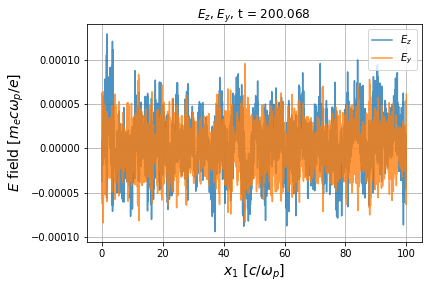

In [3]:
import matplotlib.pyplot as plt

iter = len(Emf[0])//2
x=np.linspace(0, sim.box, sim.nx)
plt.plot(x,Emf[1][iter], label = "$E_z$",alpha=0.8)
plt.plot(x,Emf[2][iter], label = "$E_y$",alpha=0.8)
plt.grid(True)
plt.xlabel("$x_1$ [$c/\omega_p$]",fontsize=14)
plt.ylabel("$E$ field [$m_ec\omega_p/e$]",fontsize=14)
plt.title("$E_z$, $E_y$, t = {:g}".format( iter * sim.dt*ndump))
plt.legend(loc=1)
plt.show()

In the following cells we will plot $\omega (k)$ by taking a field component $E_i(x,t)$ and Fourier analyzing it in both position and time.

#### Dispersion of the O-wave

First we will plot the dispersion relation of the ordinary wave, by performing the FFT (time and space) of the $z$ component of the electric field, $E_z$. To do so evaluate the next cell.

In [4]:
from matplotlib.colors import LogNorm


Efld=np.array(Emf[2])
win = np.hanning(len(Efld[0]))
for it in range(len(Efld)):
    Efld[it] *=win

sp = np.abs(np.fft.fft2(Efld))**2
sp = np.fft.fftshift( sp )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt /ndump

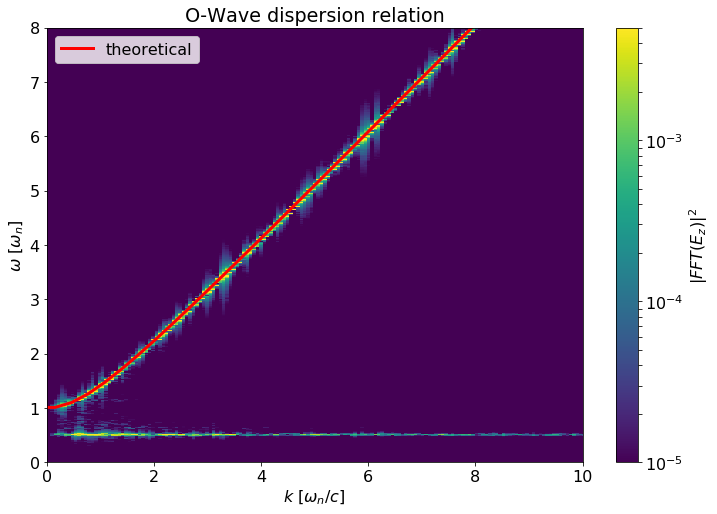

In [5]:
fig=plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})

plt.imshow( sp, origin = 'lower',  norm=LogNorm(vmin=1e-5, vmax=5e-3),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto')

plt.colorbar().set_label('$|FFT(E_z)|^2$')

Theoretical= True

plt.ylim(0,8)
plt.xlim(0,10)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("O-Wave dispersion relation")

if (Theoretical):
    # Theoretical prediction
    k = np.linspace(-k_max, k_max, num = 512)
    plt.plot( k, np.sqrt( 1 + k**2),c="r", label = "theoretical",lw=3)
    plt.legend(loc=0)

* What are the range of frequencies for which the o-wave exists?

From the graph we see that the frequencies exist from $[1,\infty]$ and for 0.5.

Since the frequencies in the simulation are normalized, the range is from $\omega_e$ to $\infty$, which corresponds to the theoretical dispertion relation:

$\omega^2=\omega_p^2+k^2c^2 => \frac{\omega^2}{\omega_p^2}=1+\frac{k^2c^2}{\omega_p^2}$

To have real solutions the $\omega>\omega_p$. 

There is also a frequency of $\frac{1}{2}\omega_p=\Omega_c$ which was unexpected according to the theoretical dispersion.

### Dispersion of the X-wave

Now we will plot the dispersion relation of the extraordinary wave, by again performing a two-dimensional FFT, but this time of the $x$ and $y$ components of the electric field, $E_x$ and $E_y$. Let's start with $E_y$:

In [6]:
from matplotlib.colors import LogNorm

Efld=np.array(Emf[1])
win = np.hanning(len(Efld[0]))
for it in range(len(Efld)):
    Efld[it] *=win

sp2 = np.abs(np.fft.fft2(Efld))**2
sp2 = np.fft.fftshift( sp2 )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt /ndump

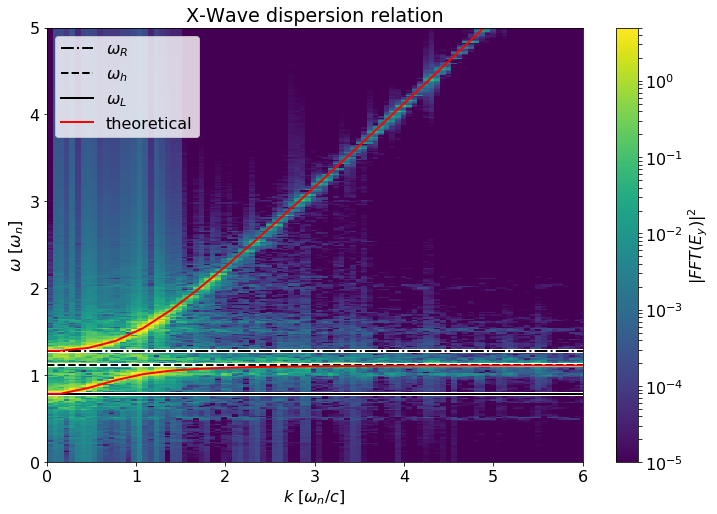

In [7]:
fig=plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.imshow( sp2, origin = 'lower',  norm=LogNorm(vmin=1e-5, vmax=5e-0),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto')

plt.colorbar().set_label('$|FFT(E_y)|^2$')

Theoretical=True

plt.ylim(0,5)
plt.xlim(0,6)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("X-Wave dispersion relation")

if (Theoretical):
    # Theoretical prediction
    k = np.linspace(-k_max, k_max, num = 512)
    wh = np.sqrt(1+B[2]**2)
    wR=0.5*(np.sqrt(B[2]**2+4)+B[2])
    wL=0.5*(np.sqrt(B[2]**2+4)-B[2])

    plt.axhline(wR,c="w",lw=4)
    plt.axhline(wR,c="k",lw=2,ls="-.",label="$\omega_R$")
    
    plt.axhline(wh,c="w",lw=4)
    plt.axhline(wh,c="k",lw=2,ls="--",label="$\omega_h$")

    plt.axhline(wL,c="w",lw=4)
    plt.axhline(wL,c="k",lw=2,label="$\omega_L$")

    wplot =np.sqrt(k**2+wh**2+1+np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    wplot2=np.sqrt(k**2+wh**2+1-np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    plt.plot( k, wplot,c="r", label = "theoretical",lw=2)
    plt.plot( k, wplot2,c="r",lw=2)
    plt.legend(loc=0)

* What are the range of frequencies for which the x-wave exists?

Frequencies in $\left[\omega_L, \omega_H\right]$ and  $\left[\omega_R ,\infty \right[$.

* Why does the signal of $E_y$ vanish when the frequency approaches $\omega_H$?

When $\omega=\omega_H$ the electromagnetic waves are trasformed into upper hybrid waves. This waves are longitudinal ($\vec{E_1}$//$\vec{k}$), so the component of the electric field that oscillates is the one with the same direction as k, so in the x component. As the frequency approaches the upper hybrid frequency the oscillation of the elecctic field in the y direction will vanish.

The ratio of $E_y/E_x$ tends to 0 when $\omega$ tend to $\omega_H$ so $E_y$ vanishes.

$\omega_H^2$=$\omega_e^2$+$\Omega_e^2$

Now we plot the two-dimensional FFT of $E_x(x,t)$:

In [8]:
from matplotlib.colors import LogNorm

Efld=np.array(Emf[0])
win = np.hanning(len(Efld[0]))
for it in range(len(Efld)):
    Efld[it] *=win

sp3 = np.abs(np.fft.fft2(Efld))**2
sp3 = np.fft.fftshift( sp3 )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt /ndump

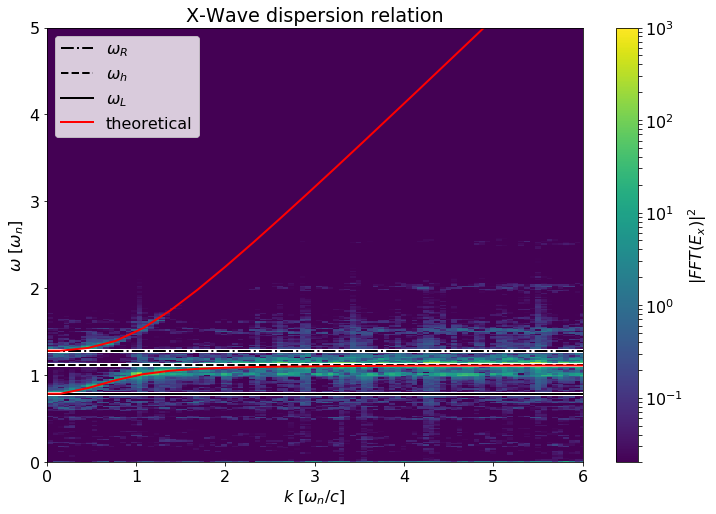

In [9]:
fig=plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.imshow( sp3, origin = 'lower',  norm=LogNorm(vmin=2e-2, vmax=1e3),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto')

plt.colorbar().set_label('$|FFT(E_x)|^2$')



Theoretical=True

plt.ylim(0,5)
plt.xlim(0,6)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("X-Wave dispersion relation")

if (Theoretical):
    # Theoretical prediction
    k = np.linspace(-k_max, k_max, num = 512)
    wh = np.sqrt(1+B[2]**2)
    wR=0.5*(np.sqrt(B[2]**2+4)+B[2])
    wL=0.5*(np.sqrt(B[2]**2+4)-B[2])

    plt.axhline(wR,c="w",lw=4)
    plt.axhline(wR,c="k",lw=2,ls="-.",label="$\omega_R$")
    
    plt.axhline(wh,c="w",lw=4)
    plt.axhline(wh,c="k",lw=2,ls="--",label="$\omega_h$")

    plt.axhline(wL,c="w",lw=4)
    plt.axhline(wL,c="k",lw=2,label="$\omega_L$")

    wplot =np.sqrt(k**2+wh**2+1+np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    wplot2=np.sqrt(k**2+wh**2+1-np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    plt.plot( k, wplot,c="r", label = "theoretical",lw=2)
    plt.plot( k, wplot2,c="r",lw=2)
    plt.legend(loc=0)

* Why does the signal of $E_x$ vanish for the branch with $\omega > \omega_R$?

For $\omega > \omega_R$,

From the equation:
\begin{equation}
\frac{E_y}{E_x}=i \frac{\omega}{\omega_c} \frac{\omega^2-\omega_h^2}{\omega_p^2}.  
\end{equation}

We can see that as the ratio between $E_y$ and $E_x$ gets bigger with $\omega$.
For $\omega$=2 (which seems to be the point at which the signal vanishes), $\left|E_y\right|=11\left|E_x\right|$, so $E_x$ is small for values of $\omega$  bigger than $\omega_R$.

### Second case: $\omega_c=2.0\omega_p$

In the following cell we define the initial simulation parameters.

In [10]:
electrons = em1d.Species( "electrons", -1.0, ppc, uth=vth)

Emf=[[],[],[]]
dens=[]

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, species=(electrons), report = rep )


B=[0.0, 0.0, 2.0]
sim.emf.set_ext_fld("uniform", B0=B)

Run the following cell to proceed with the simulation.

In [11]:
sim.run( tmax ) #run simulation


Running simulation up to t = 400 ...
n = 10127, t = 400.017
Done.


In the following cells we will plot $\omega (k)$ by taking a field component $E_i(x,t)$, $i=\{x,y,z \}$ and Fourier analyzing it in both position and time.

#### Dispersion of the O-wave

First we will plot the dispersion relation of the ordinary wave, by performing the FFT (time and space) of the $z$ component of the electric field, $E_z$. To do so evaluate the next cell.

In [12]:
from matplotlib.colors import LogNorm


Efld=np.array(Emf[2])
win = np.hanning(len(Efld[0]))
for it in range(len(Efld)):
    Efld[it] *=win

sp = np.abs(np.fft.fft2(Efld))**2
sp = np.fft.fftshift( sp )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt /ndump

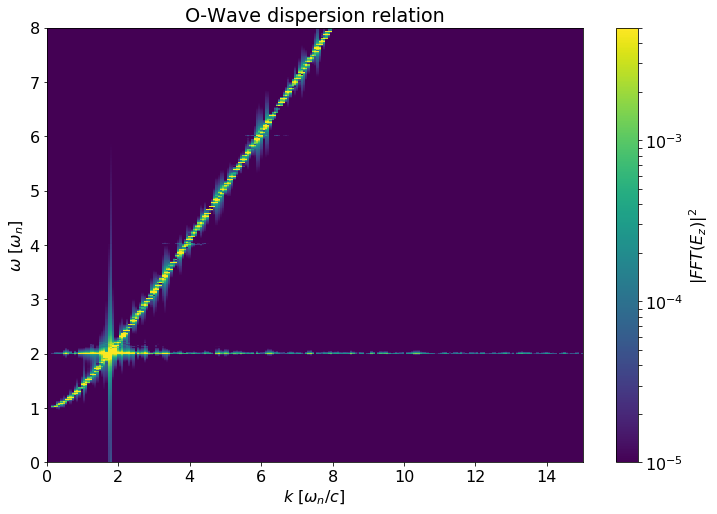

In [13]:
fig=plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})

plt.imshow( sp, origin = 'lower',  norm=LogNorm(vmin=1e-5, vmax=5e-3),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto')

plt.colorbar().set_label('$|FFT(E_z)|^2$')

Theoretical= False

plt.ylim(0,8)
plt.xlim(0,15)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("O-Wave dispersion relation")

if (Theoretical):
    # Theoretical prediction
    k = np.linspace(-k_max, k_max, num = 512)
    plt.plot( k, np.sqrt( 1 + k**2),c="r", label = "theoretical",lw=3)
    plt.legend(loc=0)

* Why didn't the $\omega(k)$ plot change when we changed $B_0$?

The dispersion relation of the ordinary wave does not change with the magnetic field: $\omega^2=\frac{4\pi e^2 no}{m_e}+k^2c^2$
The ordinary waves propagate in the same direction as the external magnetic field, the component with this field is $v\times B_0$, so it does not affect the same direction, so it does not change the dispersion relation.

The line that has de value has changed to 4 times de value since $\Omega_c=\frac{eB_0}{m_e}$

### Dispersion of the X-wave

Now we will plot the dispersion relation of the extraordinary wave, by again performing a two-dimensional FFT of $E_y$:

In [14]:
from matplotlib.colors import LogNorm

Efld=np.array(Emf[1])
win = np.hanning(len(Efld[0]))
for it in range(len(Efld)):
    Efld[it] *=win

sp2 = np.abs(np.fft.fft2(Efld))**2
sp2 = np.fft.fftshift( sp2 )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt /ndump

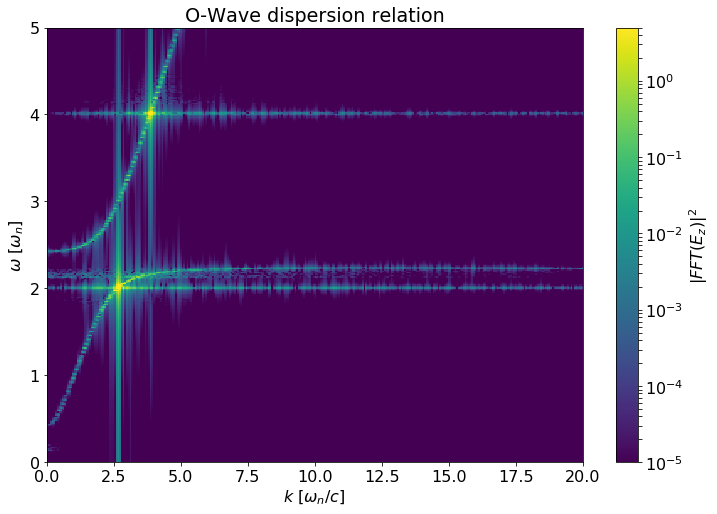

In [15]:
fig=plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.imshow( sp2, origin = 'lower',  norm=LogNorm(vmin=1e-5, vmax=5e-0),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto')

plt.colorbar().set_label('$|FFT(E_z)|^2$')



Theoretical=False

plt.ylim(0,5)
plt.xlim(0,20)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("O-Wave dispersion relation")

if (Theoretical):
    # Theoretical prediction
    k = np.linspace(-k_max, k_max, num = 512)
    wh = np.sqrt(1+B[2]**2)
    wR=0.5*(np.sqrt(B[2]**2+4)+B[2])
    wL=0.5*(np.sqrt(B[2]**2+4)-B[2])

    plt.axhline(wR,c="w",lw=4)
    plt.axhline(wR,c="k",lw=2,ls="-.",label="$\omega_R$")
    
    plt.axhline(wh,c="w",lw=4)
    plt.axhline(wh,c="k",lw=2,ls="--",label="$\omega_h$")

    plt.axhline(wL,c="w",lw=4)
    plt.axhline(wL,c="k",lw=2,label="$\omega_L$")

    wplot =np.sqrt(k**2+wh**2+1+np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    wplot2=np.sqrt(k**2+wh**2+1-np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    plt.plot( k, wplot,c="r", label = "theoretical",lw=2)
    plt.plot( k, wplot2,c="r",lw=2)
    plt.legend(loc=0)

* Is the ordering of $\omega_R$, $\omega_L$ and $\omega_H$ the same as in the previous case?

By looking at the graph they seem to have the same order: There is a cuttoff region between the lower and the upper curves.
From the formulas in the begining of the notebook:

$\omega_R=\frac{2+\sqrt{8}}{2}\omega_p=2.41\omega_p$

$\omega_H=\sqrt{5}\omega_p=2.24\omega_p$

$\omega_L=\frac{-2+\sqrt{8}}{2}\omega_p=0.414\omega_p$

So they have the same order.

## Next we plot once again the FFT of $E_x(x,t)$:

In [16]:
from matplotlib.colors import LogNorm

Efld=np.array(Emf[0])
win = np.hanning(len(Efld[0]))
for it in range(len(Efld)):
    Efld[it] *=win

sp3 = np.abs(np.fft.fft2(Efld))**2
sp3 = np.fft.fftshift( sp3 )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt /ndump

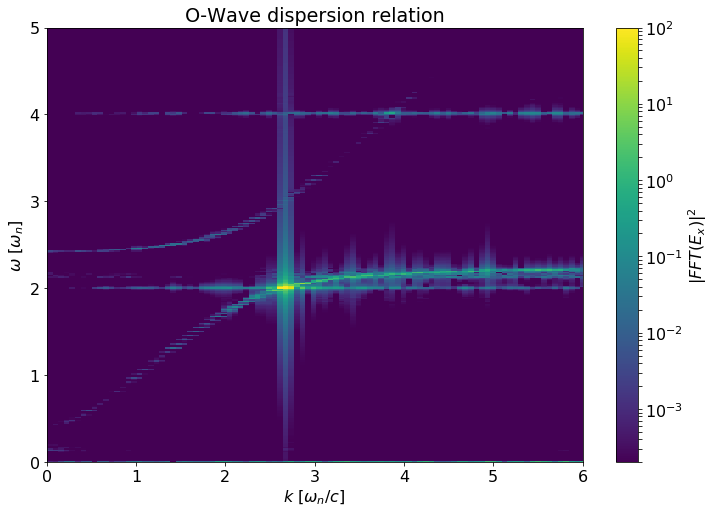

In [17]:
fig=plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.imshow( sp3, origin = 'lower',  norm=LogNorm(vmin=2e-4, vmax=1e2),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto')

plt.colorbar().set_label('$|FFT(E_x)|^2$')



Theoretical=False

plt.ylim(0,5)
plt.xlim(0,6)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("O-Wave dispersion relation")

if (Theoretical):
    # Theoretical prediction
    k = np.linspace(-k_max, k_max, num = 512)
    wh = np.sqrt(1+B[2]**2)
    wR=0.5*(np.sqrt(B[2]**2+4)+B[2])
    wL=0.5*(np.sqrt(B[2]**2+4)-B[2])

    plt.axhline(wR,c="w",lw=4)
    plt.axhline(wR,c="k",lw=2,ls="-.",label="$\omega_R$")
    
    plt.axhline(wh,c="w",lw=4)
    plt.axhline(wh,c="k",lw=2,ls="--",label="$\omega_h$")

    plt.axhline(wL,c="w",lw=4)
    plt.axhline(wL,c="k",lw=2,label="$\omega_L$")

    wplot =np.sqrt(k**2+wh**2+1+np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    wplot2=np.sqrt(k**2+wh**2+1-np.sqrt(k**4-2*k**2*wh**2+wh**4+2*k**2+2*wh**2-3))/np.sqrt(2)
    plt.plot( k, wplot,c="r", label = "theoretical",lw=2)
    plt.plot( k, wplot2,c="r",lw=2)
    plt.legend(loc=0)

* Why do we get a stronger signal for the branch with $\omega$ near $\omega_h$ when $k>4\omega_p/c$?


When $\omega$=$\omega_h$ $E_y/E_x=0$, so the $E_x$ electric field would be at its maximum. Above $k>4\omega_p c$ w is very close to $\omega_h$.

When $\omega$ tends towards $\omega_h$ the waves tends towards hybrid wave which is longitudinal, so only the signal of $E_x$ getts larger and $E_y$ gets smaller. 